## **STUDENT INFORMATION :**

Name : Ayushi Singh

email : singhayushijosephite@gmail.com

skillsbuild email : singhayushijosephite@gmail.com

College : Manipal Institute of Technology, Manipal, Karnataka

Internship Domain : Data Analytics (DA)

Start Date : 12/06/2023

End Date : 24/07/2023






# **Project Topic - Analysis of Superstore dataset.**

## Meta Data

Dataset link-https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download

(From Superstore Dataset Data Card)
>
    Row ID => Unique ID for each row.
    Order ID => Unique Order ID for each Customer.
    Order Date => Order Date of the product.
    Ship Date => Shipping Date of the Product.
    Ship Mode=> Shipping Mode specified by the Customer.
    Customer ID => Unique ID to identify each Customer.
    Customer Name => Name of the Customer.
    Segment => The segment where the Customer belongs.
    Country => Country of residence of the Customer.
    City => City of residence of of the Customer.
    State => State of residence of the Customer.
    Postal Code => Postal Code of every Customer.
    Region => Region where the Customer belong.
    Product ID => Unique ID of the Product.
    Category => Category of the product ordered.
    Sub-Category => Sub-Category of the product ordered.
    Product Name => Name of the Product
    Sales => Sales of the Product.
    Quantity => Quantity of the Product.
    Discount => Discount provided.
    Profit => Profit/Loss incurred

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
# Load the dataset with Order ID as Index.
df= pd.read_csv('Sample - Superstore.csv', index_col='Row ID',encoding='cp1252')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## **Data Exploration and Cleaning**

In [ ]:

# Size of the dataset
df.shape
print('The number of rows is {} and number columns in the dataframe is {}'.format(df.shape[0],df.shape[1]))

The number of rows is 9994 and number columns in the dataframe is 20


In [ ]:
# Dropping Row Id as it is of no use.
#df.drop("Row ID", axis=1, inplace=True)

### Postal code data is not required for our analysis.So,we drop that column.

In [ ]:
# Drop postal code column from original dataset as it is not required for analysis.
df.drop(columns="Postal Code",inplace=True)

In [ ]:
# Display non-null column with their datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Region         9994 non-null   object 
 11  Product ID     9994 non-null   object 
 12  Category       9994 non-null   object 
 13  Sub-Category   9994 non-null   object 
 14  Product Name   9994 non-null   object 
 15  Sales          9994 non-null   float64
 16  Quantity       9994 non-null   int64  
 17  Discount       9994 non-null   float64
 18  Profit  

In [ ]:
from pandas.core.interchange.dataframe_protocol import DataFrame
## Changing the datatypes of the following column in the dataset.
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')

In [ ]:
# Statistical description of the numerical data
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
# Checking summary statistics of non-numerical columns in the dataset.
df.describe(include = np.object)

<ipython-input-9-6a75392b94c9>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include = np.object)


,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [ ]:
# To find missing values
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

No missing values found.

In [ ]:
# Check for duplicate rows.
df.loc[df.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,
3407,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [ ]:
# drop duplicated data
df = df.drop_duplicates()

In [ ]:
df1=df

## **Exploratory Data Analysis**

The fundamental purpose of exploratory data analysis is to aid in the examination of data prior to making any assumptions.

It can aid in the detection of obvious errors, the understanding of data patterns, the detection of outliers or unexpected events, and the discovery of noteworthy connections between variables.

The following visualizations were done in the lines of code below.

In [ ]:
# Now let's visualize the unique values of the available column.
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["State"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())
print(df["Region"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


### **Heatmap for Correlation**

This is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The darker the colour, the stronger the correlation between two variables, the lighter the colour, the lesser the correlation.

    A correlation coefficient of +1 indicates a perfect positive correlation, meaning that when one variable increases, the other variable also increases proportionally.
    A correlation coefficient of -1 indicates a perfect negative correlation, meaning that when one variable increases, the other variable decreases proportionally.
    A correlation coefficient of 0 indicates no linear correlation, meaning that there is no linear relationship between the two variables.

    

<ipython-input-15-ec0243130a6b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


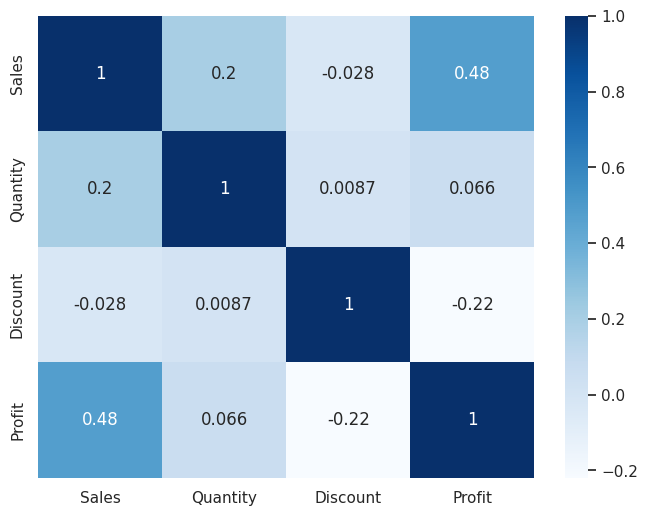

In [ ]:
plt.figure(figsize=(8,6))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'Blues')

### **NUMERICAL DISTRIBUTION OF COLUMNS**

The percentage of numeric distribution allows for the measurement of each product's or reference's coverage in a distribution network.

This is an important metric for determining a product's sales potential and forecasting sales.

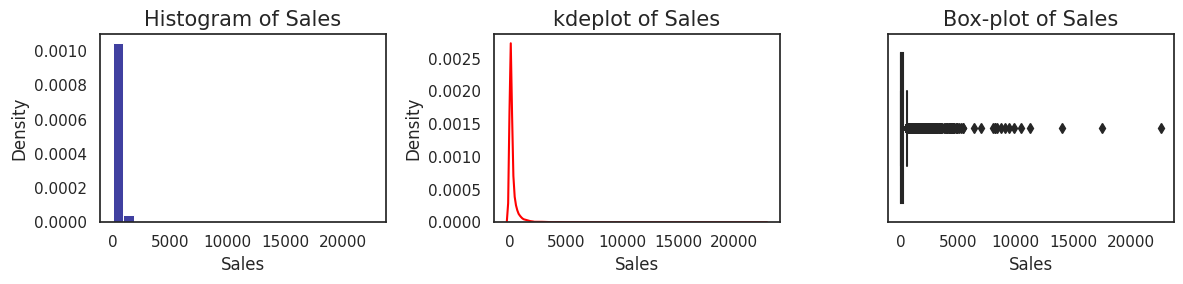

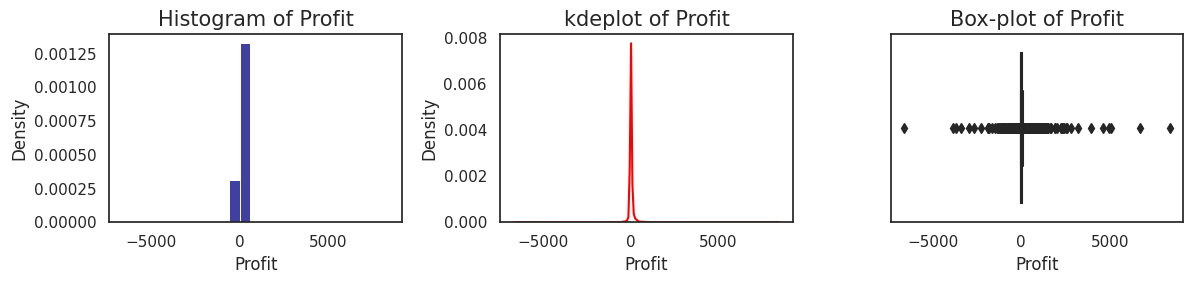

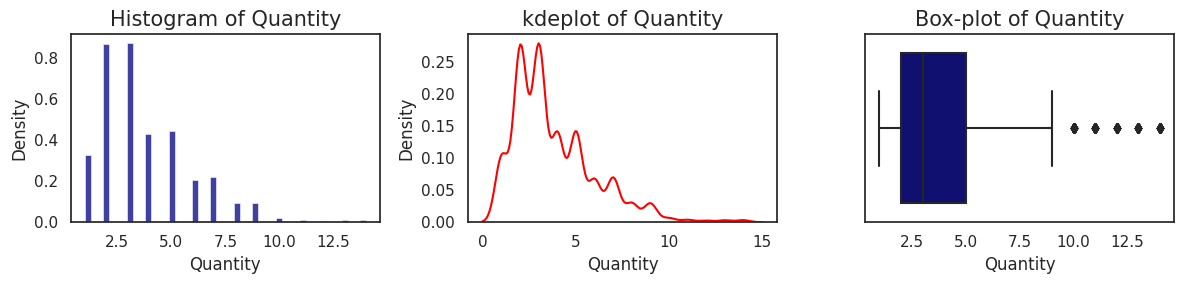

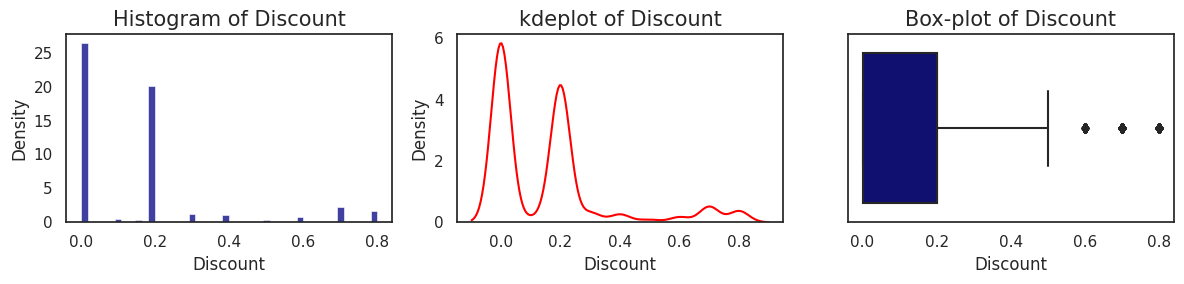

In [ ]:
imp_numerical_cols= df[['Sales','Profit','Quantity','Discount']]
for i,col in enumerate(imp_numerical_cols):
    plt.figure(figsize=(12,3))
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.subplot(1,3,1)
    sns.histplot(data = df,x=col,stat='density',bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)

    plt.subplot(1,3,2)
    sns.kdeplot(data = df,x=col,color='red')
    plt.title(f'kdeplot of {col}',size=15)

    plt.subplot(1,3,3)
    sns.boxplot(data = df,x=col,color='navy')
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

#### **Conclusion**

  The Distribution of Sales is extremely right skewed.

  The Distribution of Profit is Normally distributed with very low value of standard deviation.

  The Distribution of Quantity sold is slightly right skewed with a lot of outliers on the right side.
  
  The Distribution of Discount is multimodel in nature.

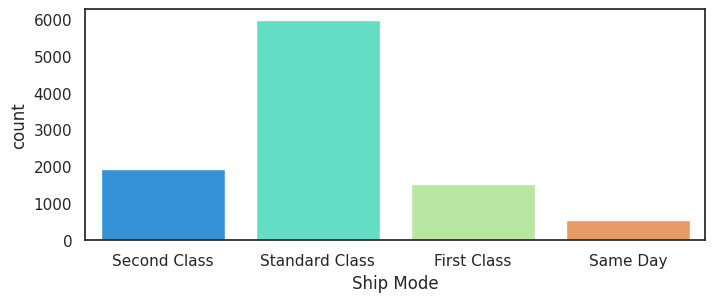

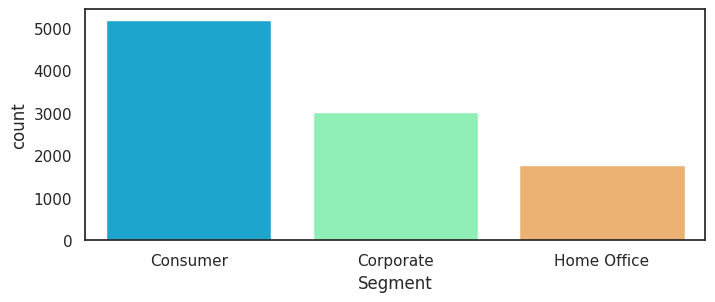

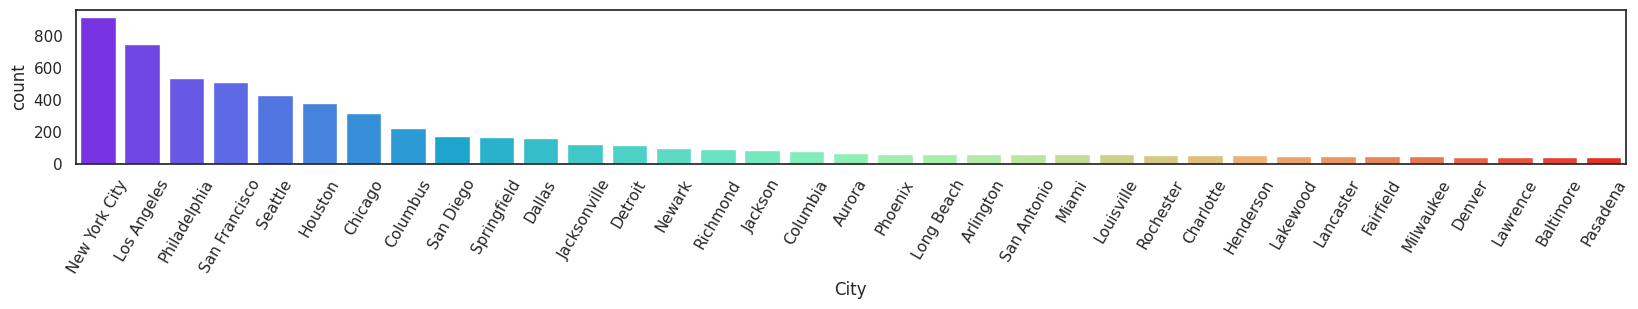

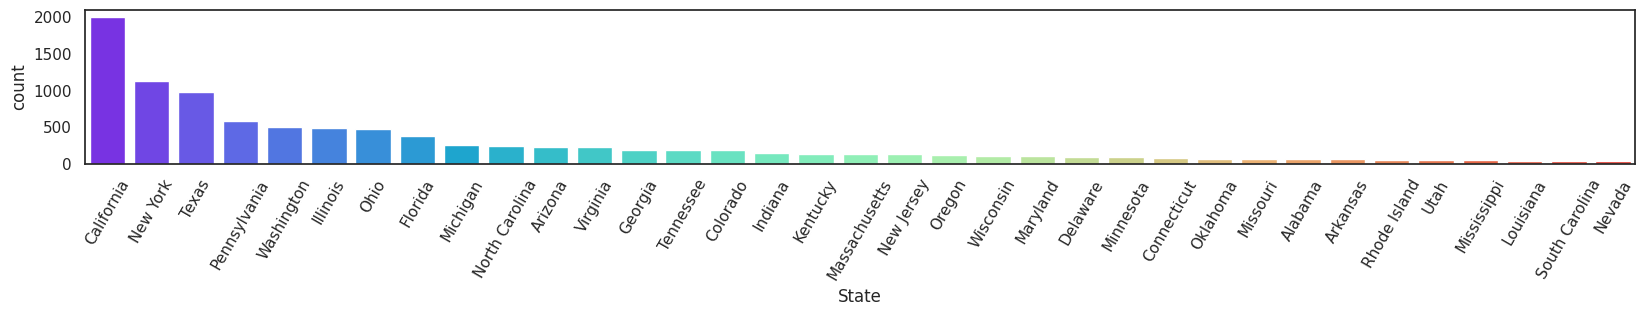

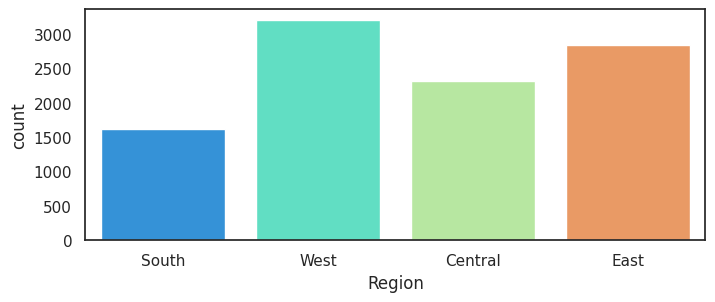

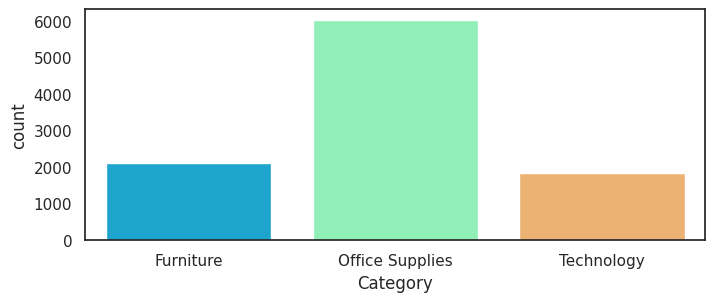

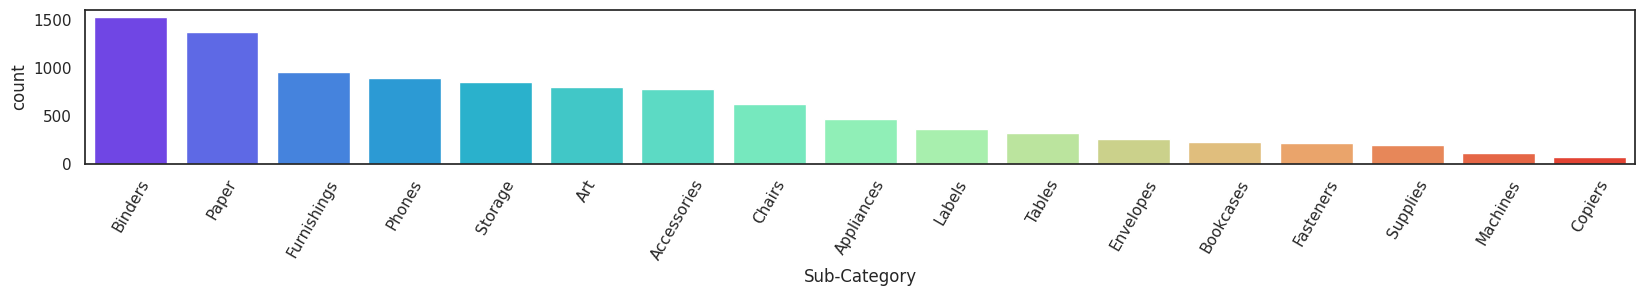

In [ ]:
imp_categotical_features=df[['Ship Mode','Segment', 'City', 'State','Region','Category', 'Sub-Category']]

for col in imp_categotical_features:
    width=8
    n=len(df[col].unique())
    if n > 15:
        width=20
        plt.figure(figsize=(width,2))
        temp=pd.DataFrame(df[col].value_counts().sort_values(ascending=False)[:35],columns=[col])
        sns.barplot(data=temp,x=temp.index,y=col,palette= 'rainbow')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.xticks(rotation=60)
    else:
        plt.figure(figsize=(width,3))
        sns.countplot(data=df,x=col,palette='rainbow')
    plt.show()

#### **Conclusion**

  -Majority of the customers prefer the Standard Class Shipment mode.

  -Most of the customers are from the Consumer segment.

  -Among all the cities New York City records the maximum purchases made followed by Los Angeles.

  -Among all the states California records the maximum purchases made followed New York.

  -Majority of the purchases are in the West and East regions as compared to South & Central.

  -Office Supplies lead the purchases made Category.
  
  -Binders and Paper are sold most in quantity in Product Sub-Category

## **Sales and Profit Analysis**

## **Geo Analysis.**

### **Sales analysis based on Region.**

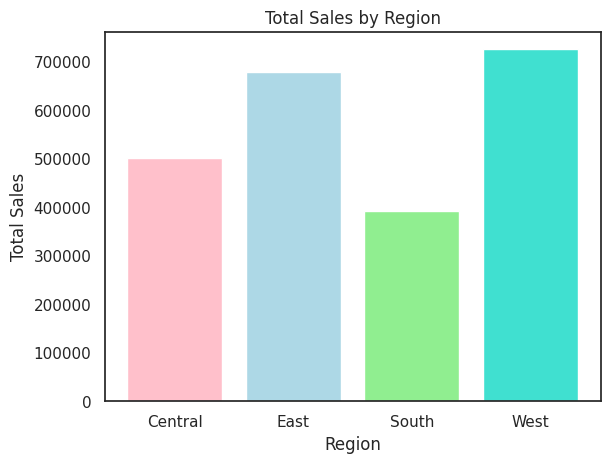

In [ ]:
## bar graph
# Group the data by region and calculate the sum of total sales
sales_by_region = df.groupby('Region')['Sales'].sum()

# Define the colors for each region
colors = ['pink', 'lightblue', 'lightgreen','TURQUOISE']

# Plotting the bar graph with multicolored bars
plt.bar(sales_by_region.index, sales_by_region.values, color=colors)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')

# Display the graph
plt.show()

Text(0.5, 1.0, 'Sales Distribution by Region')

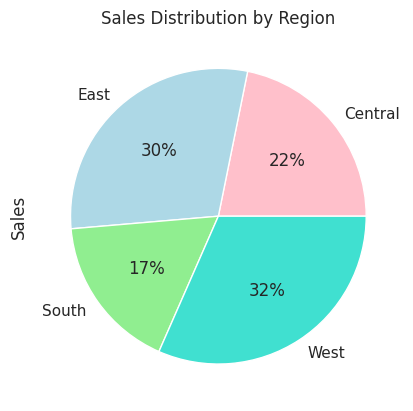

In [ ]:
##pie plot
# Define the colors for each region
colors = ['pink', 'lightblue', 'lightgreen','TURQUOISE']
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%",colors=colors)
plt.title('Sales Distribution by Region')


#### **Conclusion** -West Region has the highest sales and south region has the lowest sales.



### **Profit analysis based on Region.**

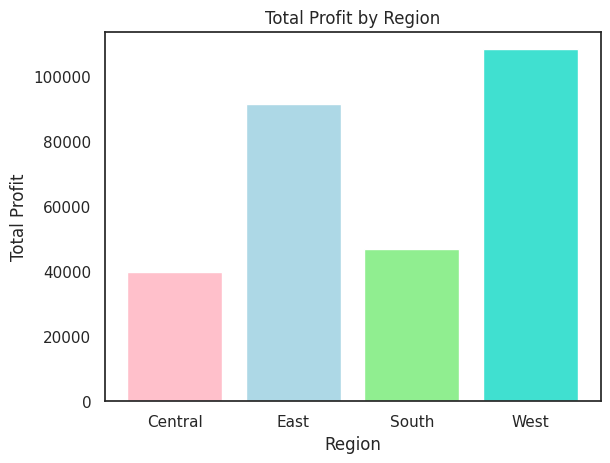

In [ ]:

# Group the data by region and calculate the sum of total sales
sales_by_region = df.groupby('Region')['Profit'].sum()

# Define the colors for each region
colors = ['pink', 'lightblue', 'lightgreen','TURQUOISE']

# Plotting the bar graph with multicolored bars
plt.bar(sales_by_region.index, sales_by_region.values, color=colors)
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Profit by Region')

# Display the graph
plt.show()

<Axes: title={'center': 'Profit Distribution by Region'}, ylabel='Profit'>

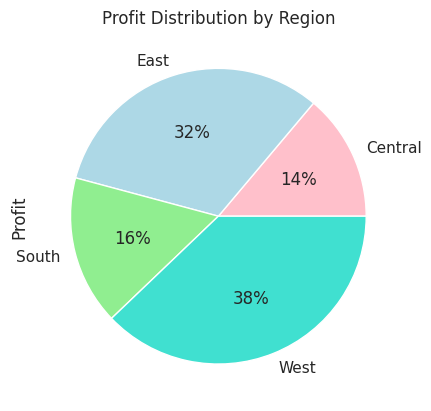

In [ ]:
## pie plot
colors = ['pink', 'lightblue', 'lightgreen','TURQUOISE']
plt.title('Profit Distribution by Region')
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%",colors=colors)

In [ ]:
regions_info = df.groupby('Region').sum()
regions_info

<ipython-input-22-9b70a1492334>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_info = df.groupby('Region').sum()


,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,39706.3625
East,678499.8680,10616,413.70,91534.8388
South,391721.9050,6209,238.55,46749.4303
West,725457.8245,12266,350.20,108418.4489


#### **Conclusion** - south region has the lowest sales but it's giving a profit greater than that of central region.We need to find the reason of this discrepancy.



### **Region-wise quantity of poducts of a particular category in demand.**

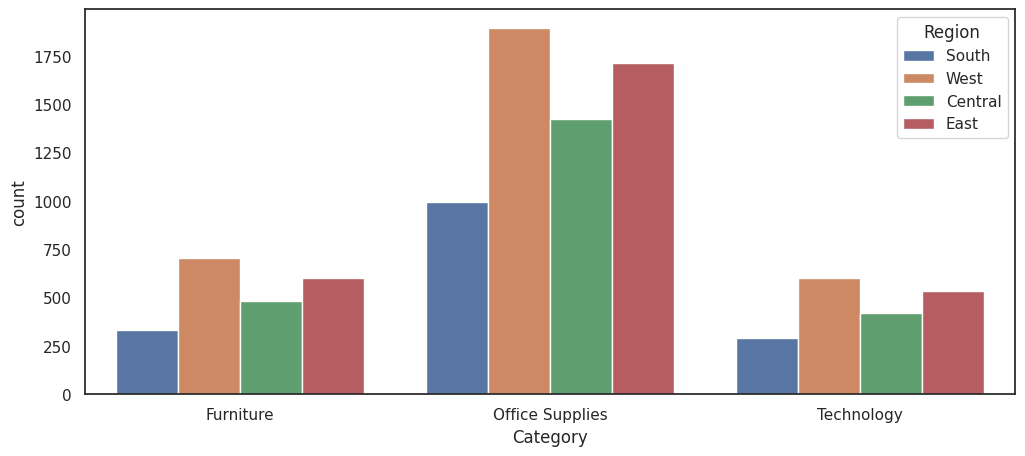

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="Category", hue="Region", data=df)
plt.show()

### **Profit analysis based on State.**

Text(0.5, 1.0, 'Profit Distribution by State')

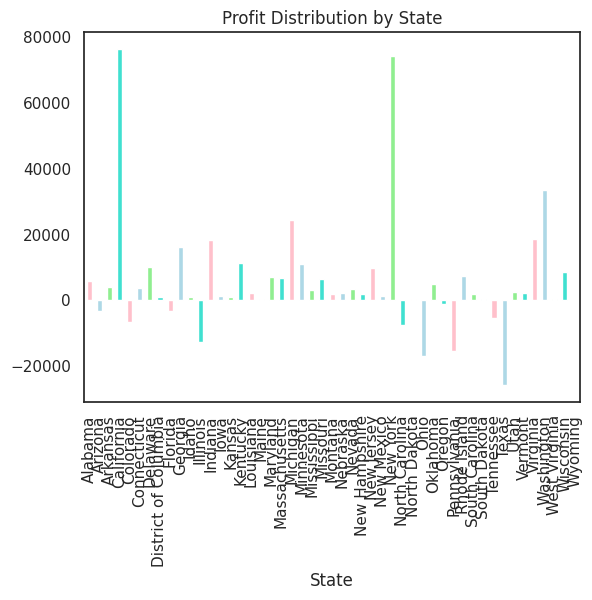

In [ ]:
colors = ['pink', 'lightblue', 'lightgreen','TURQUOISE']
df.groupby("State")["Profit"].sum().plot.bar(color=colors)
plt.title('Profit Distribution by State')

In [ ]:
## Top 10 most profitable states.
states_profit = pd.DataFrame(df.groupby('State')['Profit'].sum())
states_profit.reset_index(inplace=True)
states_profit = states_profit.sort_values( by="Profit",ascending=False)
states_profit.head(10)

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


In [ ]:
# map
fig = px.treemap(states_profit,
                 path=['State' ,'Profit'],
                 color_continuous_scale='deep',
                 values='Profit',color='Profit')
fig.update_layout(width=1000, height=500)
fig.show()

In [ ]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI"
}

In [ ]:
# Based on category.


# Create new column with State Abbreviations
df1['State_abb'] = df1['State'].replace(us_state_to_abbrev)
# Create new data table for chart below

# Make a copy of original table
data1 = df1.copy()

# Split Ship Mode values in unique columns
for ship_mode in data1['Ship Mode'].unique():
    data1[ship_mode] = data1.loc[data1['Ship Mode'] == ship_mode]['Ship Mode']

# Group by State_abb and count
data1 = data1[['State_abb', 'Second Class', 'Standard Class', 'First Class', 'Same Day']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head(3)

,State_abb,Second Class,Standard Class,First Class,Same Day
0,AL,18,33,9,1
1,AR,10,38,10,2
2,AZ,27,139,42,16


In [ ]:
fig = go.Figure()

colors = ["crimson", "lightseagreen", "royalblue","orange","lightgrey"]
columns = ["Second Class", "Standard Class", "First Class", "Same Day"]

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column],
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Orders by Shipping Mode Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()

In [ ]:
# Create new data table for chart below

# Make a copy of original table
data1 = df1.copy()

# Split Ship Mode values in unique columns
for segment in data1['Segment'].unique():
    data1[segment] = data1.loc[data1['Segment'] == segment]['Segment']

# Group by State_abb and count
data1 = data1[['State_abb', 'Consumer', 'Corporate', 'Home Office']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head(3)

,State_abb,Consumer,Corporate,Home Office
0,AL,25,28,8
1,AR,37,14,9
2,AZ,110,69,45


In [ ]:
fig = go.Figure()

colors = ["crimson", "lightseagreen", "royalblue","orange","lightgrey"]
columns = ['Consumer', 'Corporate', 'Home Office']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column],
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Orders by Segment Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()

In [ ]:
# Create new data table for chart below

# Make a copy of original table
data1 = df1.copy()

# Split Ship Mode values in unique columns
for category in data1['Category'].unique():
    data1[category] = data1.loc[data1['Category'] == category]['Category']

# Group by State_abb and count
data1 = data1[['State_abb', 'Furniture', 'Office Supplies', 'Technology']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head(3)

,State_abb,Furniture,Office Supplies,Technology
0,AL,11,36,14
1,AR,9,36,15
2,AZ,49,127,48


In [ ]:
fig= go.Figure()

colors = ["crimson", "lightseagreen", "royalblue","orange","lightgrey"]
columns = ['Furniture', 'Office Supplies', 'Technology']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column]*2,
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Orders by Category Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()


In [ ]:
# Make a copy of original table
data1 = df1.copy()

# Split Ship Mode values in unique columns
for category in data1['Sub-Category'].unique():
    data1[category] = data1.loc[data1['Sub-Category'] == category]['Sub-Category']

# Group by State_abb and count
data1 = data1[['State_abb', 'Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head(3)

,State_abb,Bookcases,Chairs,Labels,Tables,Storage,Furnishings,Art,Phones,Binders,Appliances,Paper,Accessories,Envelopes,Fasteners,Supplies,Machines,Copiers
0,AL,0,5,2,3,3,3,7,6,10,1,8,6,2,1,2,1,1
1,AR,1,2,1,1,2,5,6,4,10,0,12,11,3,2,0,0,0
2,AZ,3,16,3,9,21,21,14,23,35,6,31,22,7,6,4,3,0


In [ ]:
fig= go.Figure()

columns = ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column]*5,
                 #color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Orders by Sub-Category Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()


#### **Conclusion** -
- The highest sales is in california.California, New York, Texas, Washington and Pennsylvania are Top 5 States by Total Sales. At the same time, California and New York are leaders with a significant difference in sales compared to the rest of the states.

- California and New York is giving almost same profit.The highest profit is comming from California.Many sates with negative y-axes indicates loss.

- Despite the fact that Texas is in the top 3 in terms of sales, the state suffers the largest loss in gross profit among all.

- Ohio, Pennsylvania and Illinois also bear big losses in profit.

- California, New York and Washington have the highest gross profit values of all states.

- For the most part, the distribution of Shipping Modes by state is the same as in all data, no obvious deviations are observed.
- For the most part, the distribution of Customers Segments by state is the same as in all data. However, in some cases like in Wisconsin Consumer Segment is not the most popular.
- For the most part, the distribution of Categories and Sub-Categories by state is the same as in all data, no obvious deviations are observed.

### **Sales analysis based on City.**

In [ ]:
city_volume = pd.DataFrame(df.groupby('City')['Sales'].sum())
city_volume =city_volume.sort_values( by="Sales",ascending=False)
city_volume.head()

,Sales
City,
New York City,256368.161
Los Angeles,175851.341
Seattle,119540.742
San Francisco,112669.092
Philadelphia,109077.013


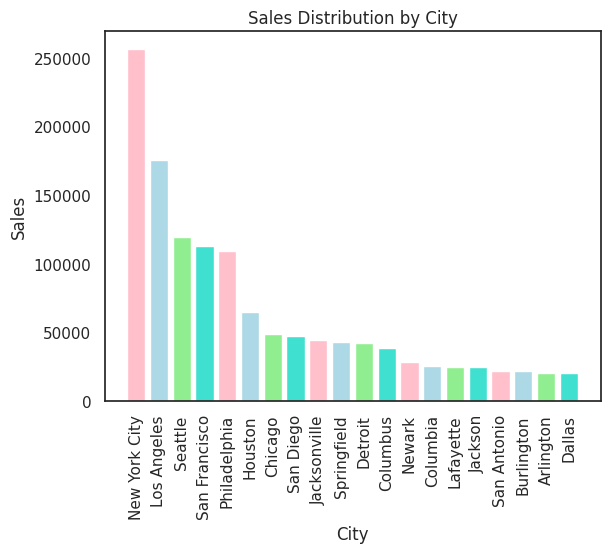

In [ ]:
## bar graph
colors = ['pink', 'lightblue', 'lightgreen','TURQUOISE']
plt.title('Sales Distribution by City')
plt.bar(city_volume.index[0:20], city_volume['Sales'][0:20],color=colors)
plt.xticks(city_volume.index[0:20],rotation = 'vertical')
plt.xlabel("City" )
plt.ylabel("Sales")
plt.show()

### **Profit analysis based on City.**

In [ ]:
## Top 10 most profitable Cities.
cities_profit = pd.DataFrame(df.groupby('City')['Profit'].sum())
cities_profit.reset_index(inplace=True)
cities_profit = cities_profit.sort_values( by="Profit",ascending=False)
cities_profit.head(10)

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


In [ ]:
## map
import plotly.express as px
fig = px.treemap(cities_profit,
                 path=['City' ,'Profit'],
                 color_continuous_scale='deep',
                 values='Profit',color='Profit')

fig.update_layout(width=1000, height=500)
fig.show()

## **Customer Analysis**

### **Sales analysis based on Segment.**

Text(0.5, 1.0, 'Total Sales by Segment')

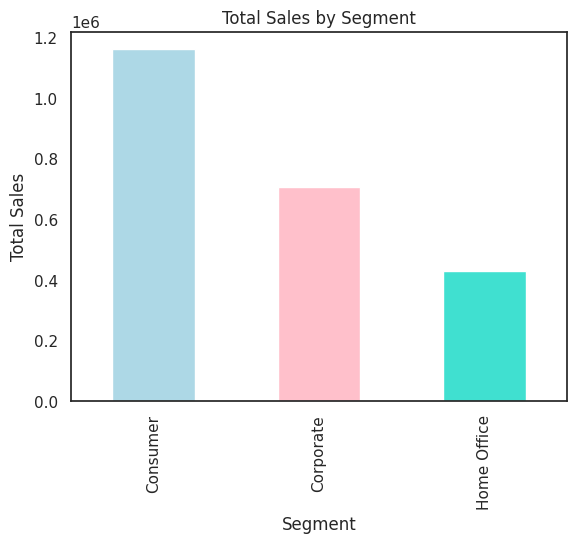

In [ ]:
colors = ['lightblue', 'pink','TURQUOISE']
df.groupby("Segment")["Sales"].sum().plot.bar(color=colors)
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales by Segment')

Text(0.5, 1.0, 'Sales Distribution by Segment')

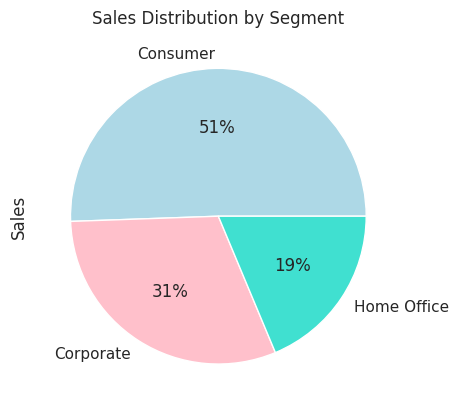

In [ ]:
## pie plot
colors = ['lightblue', 'pink','TURQUOISE']
df.groupby("Segment")["Sales"].sum().plot.pie(autopct="%1.0f%%",colors=colors)
plt.title('Sales Distribution by Segment')

### **Profit analysis based on Segment.**

Text(0.5, 1.0, 'Total Profit by Segment')

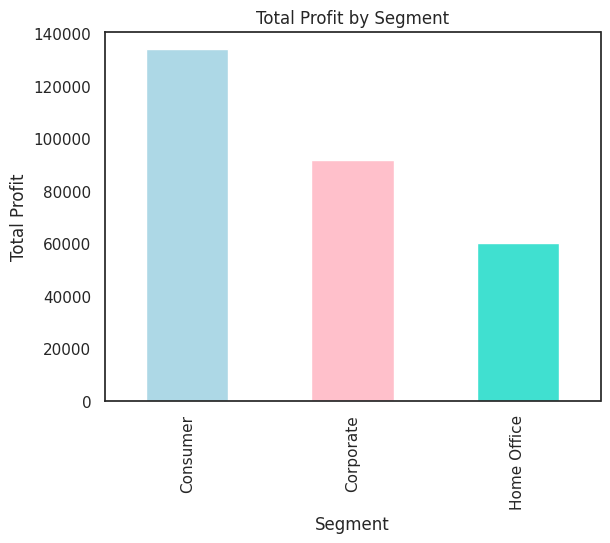

In [ ]:
## bar graph
colors = ['lightblue', 'pink','TURQUOISE']
df.groupby("Segment")["Profit"].sum().plot.bar(color=colors)
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Total Profit by Segment')

Text(0.5, 1.0, 'Profit Distribution by Segment')

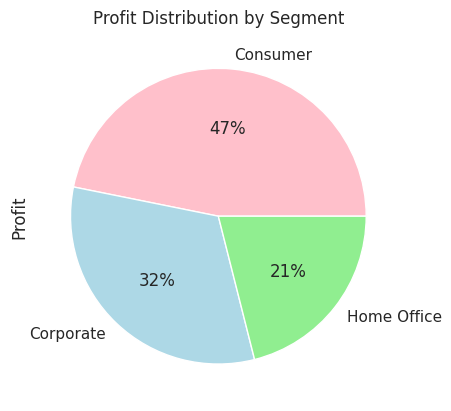

In [ ]:
## pie plot
colors = ['pink', 'lightblue', 'lightgreen','TURQUOISE']
df.groupby("Segment")["Profit"].sum().plot.pie(autopct="%1.0f%%",colors=colors)
plt.title('Profit Distribution by Segment')

In [ ]:
customer_segment_info = df.groupby('Segment').sum()
customer_segment_info

<ipython-input-44-4524ee68fa7d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.161401e+06,19521,820.91,134119.2092
Corporate,7.061464e+05,11608,477.85,91979.1340
Home Office,4.293718e+05,6742,262.03,60310.7373


#### **Conclusion**
- The sales and profit are proportional to eachother segment wise.It is realized that the consumer segment is doing positively well in terms of profit and sales and the Home Office segment is the least performing in terms of sales and profit.



#### **Regular Customers.**

In [ ]:
# CREATE TABLE

# let's say customer is regular if they have 10 or more orders:

regular_customers = df.groupby('Customer ID', as_index = False)['Order ID'].count()

# it's not the best method to do this, but I now exact max value is 37, so i can replace "manualy"
regular_customers = regular_customers.replace(range(1, 10), 1)
regular_customers = regular_customers.replace(range(10, 38), 2)

# goupby one more table with sum profit and sales for future join
customers_sales_profit = df[['Sales', 'Profit', 'Customer ID']].groupby('Customer ID', as_index = False).sum()

# now join sales and profit values
regular_customers_merged = pd.merge(left = regular_customers, right = customers_sales_profit, how = 'left', on = 'Customer ID')

# drop customer id column
regular_customers_merged.drop(columns = 'Customer ID', inplace = True)
# rename Order ID column to Customer and replace values 1 and 2 to Not Regular and Regular
regular_customers_merged.rename(columns = {'Order ID': 'Customer'}, inplace = True)
regular_customers_merged['Customer'] = regular_customers_merged['Customer'].replace({1:'Not Regular', 2: 'Regular'})

#groupby Customer column:
regular_customers = regular_customers_merged.groupby('Customer', as_index = False).sum()

regular_customers_merged
## PLOT

fig = go.Figure(go.Pie(labels = regular_customers['Customer'],
                 values = regular_customers['Sales'],
                 )
        )
fig.update_traces(
    marker=dict(
            colors=colors,
            line=dict(
                    color='#000000',
                    width=1
            )
    ),
    pull=[0.1, 0]
)
#Set Title and x/y axis labels
fig.update_layout(
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Number of Sales by Customer Type<br>(Regular/Not Rugular)",
        'y':0.9,
        'x':0.1
        },
    template = 'simple_white',
    )

fig.show()


In [ ]:
## CREATE TABLE

# let's say customer is regular if they have 10 or more orders:

regular_customers = df.groupby('Customer ID', as_index = False)['Order ID'].count()

# it's not the best method to do this, but I now exact max value is 37, so i can replace "manualy":
regular_customers = regular_customers.replace(range(1, 10), 1)
regular_customers = regular_customers.replace(range(10, 38), 2)

# goupby one more table with sum profit and sales for future join:
customers_sales_profit = df[['Sales', 'Profit', 'Customer ID']].groupby('Customer ID', as_index = False).sum()

# now join sales and profit values:
regular_customers_merged = pd.merge(left = regular_customers, right = customers_sales_profit, how = 'left', on = 'Customer ID')

# drop customer id column:
regular_customers_merged.drop(columns = 'Customer ID', inplace = True)

# rename Order ID column to Customer and replace values 1 and 2 to Not Regular and Regular:
regular_customers_merged.rename(columns = {'Order ID': 'Customer'}, inplace = True)
regular_customers_merged['Customer'] = regular_customers_merged['Customer'].replace({1:'Not Regular', 2: 'Regular'})

#groupby Customer column:
regular_customers = regular_customers_merged.groupby('Customer', as_index = False).sum()

#create profit margin column:
margin_regular_customers = regular_customers.copy()
margin_regular_customers['Profit Margin'] = regular_customers['Profit'] / regular_customers['Sales'] * 100

## PLOT

fig = go.Figure(go.Bar(x = margin_regular_customers['Customer'],
                 y = margin_regular_customers['Profit Margin'],
                 )
        )
fig.update_traces(
    marker=dict(
            color=colors,
    ),
   # pull=[0.1, 0]
)
#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title = "Customer Type",
    yaxis_title = "Profit Margin (%)",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Profit Margin Value by Customer Type",
        'y':0.9,
        'x':0.5
        },
    template = 'simple_white',
    )

fig.show()

#### **Conclusion**


- Most of the sales comes from regular customers. Even though I chose pretty high value to determine either customer is Regular or Not (that is minimum 10 orders) Regular Customers is a majority in this dataset.
- Regular Customers have higher value of profit margin, almost twice as much as for Not Regular Customers.

## **Product Analysis**

### **Sales analysis based on Category.**

Text(0.5, 1.0, 'Total Sales by Category')

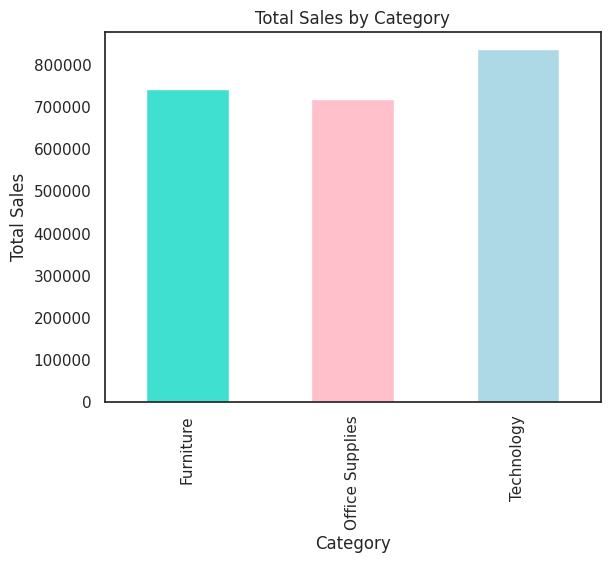

In [ ]:
## bar graph
colors = ['TURQUOISE','pink', 'lightblue']
df.groupby("Category")["Sales"].sum().plot.bar(color=colors)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')

Text(0.5, 1.0, 'Sales Distribution by Category')

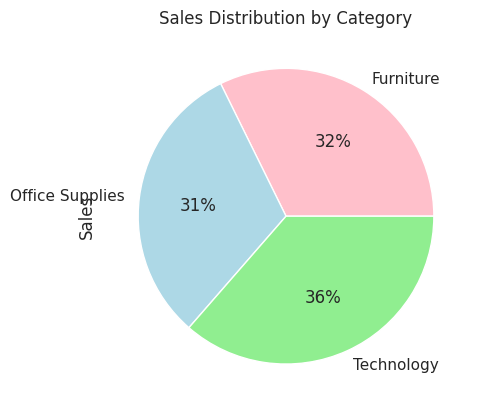

In [ ]:
## pie plot.
colors = ['pink', 'lightblue', 'lightgreen','TURQUOISE']
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.0f%%",colors=colors)
plt.title('Sales Distribution by Category')



### **Profit analysis based on Category**

Text(0.5, 1.0, 'Profit Distribution by Category')

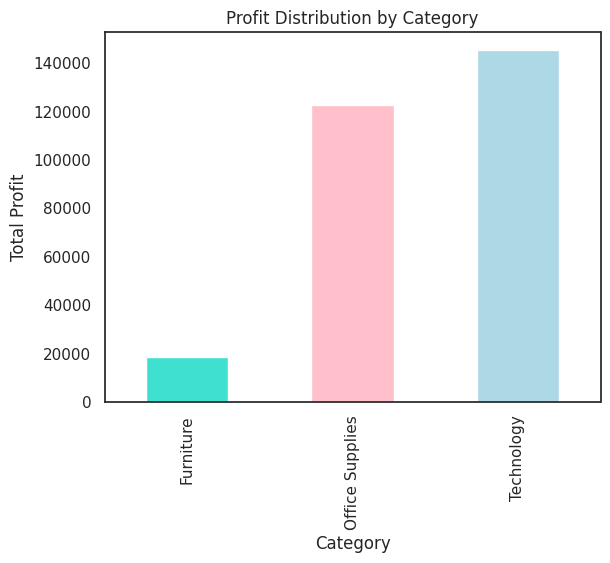

In [ ]:
## bar graph
colors = ['TURQUOISE','pink', 'lightblue']
df.groupby("Category")["Profit"].sum().plot.bar(color=colors)
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.title('Profit Distribution by Category')

Text(0.5, 1.0, 'Profit Distribution by Category')

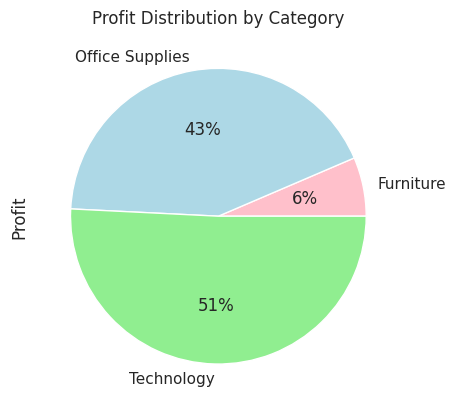

In [ ]:
## pie plot
colors = ['pink', 'lightblue', 'lightgreen','TURQUOISE']
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.0f%%",colors=colors)
plt.title('Profit Distribution by Category')

In [ ]:
category_info = df.groupby('Category').sum()
category_info

<ipython-input-51-a4518833e0a0>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,741718.4233,8026,368.59,18463.3316
Office Supplies,719047.0320,22906,947.80,122490.8008
Technology,836154.0330,6939,244.40,145454.9481


#### **Conclusion**

- The sales and profit are highest in the category of Technology.Although the sales of office supply is less than sales of furniture,office supply give a better profit.

- Here, we can see that quantity of office supply sold is most followed by furniture and technology

- Next off, we see that the Furniture category is the second best selling category after the Technology category but brings in the least profits.

- Lastly, the least selling category shown as the Office Supplies, is the category bringing in the second best category performing in terms of profit.

These insights are important to be data driven decisions later in the final analysis.

### **Most profitable Sub-Category.**

In [ ]:
sub_category_info = pd.DataFrame(df.groupby('Sub-Category').sum())
sub_category_info.reset_index(inplace=True)
sub_category_info

<ipython-input-52-374ef5c7605f>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Sub-Category,Sales,Quantity,Discount,Profit
0,Accessories,167380.3180,2976,60.80,41936.6357
1,Appliances,107532.1610,1729,77.60,18138.0054
2,Art,27118.7920,3000,59.60,6527.7870
3,Binders,203412.7330,5974,567.00,30221.7633
4,Bookcases,114879.9963,868,48.14,-3472.5560
5,Chairs,328167.7310,2354,104.70,26602.2251
6,Copiers,149528.0300,234,11.00,55617.8249
7,Envelopes,16476.4020,906,20.40,6964.1767
8,Fasteners,3024.2800,914,17.80,949.5182
9,Furnishings,91705.1640,3563,132.40,13059.1436


In [ ]:
#Most profitable sub-category
sub_category_profit = pd.DataFrame()
sub_category_profit['Sub-Category'] = sub_category_info['Sub-Category']
sub_category_profit['Profit'] = sub_category_info['Profit']
sub_category_profit =sub_category_profit.sort_values( by="Profit",ascending=False)
sub_category_profit

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26602.2251
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


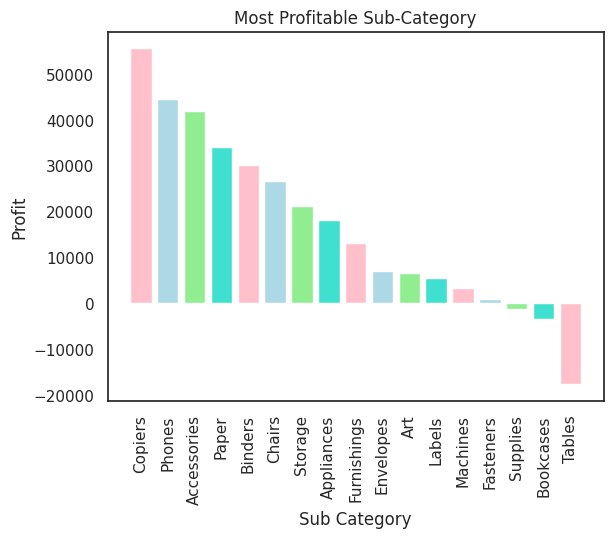

In [ ]:
## bar plot
colors = ['pink', 'lightblue', 'lightgreen','TURQUOISE']
plt.bar(sub_category_profit['Sub-Category'] , sub_category_profit['Profit'],color=colors)
plt.xticks(sub_category_profit['Sub-Category'] , rotation = "vertical")
plt.xlabel("Sub Category")
plt.ylabel("Profit")
plt.title("Most Profitable Sub-Category")
plt.show()

### **Most popular Sub-Category.**

In [ ]:
sub_category_popularity = pd.DataFrame()
sub_category_popularity['Sub-Category'] = sub_category_info['Sub-Category']
sub_category_popularity['Quantity'] = sub_category_info['Quantity']
sub_category_popularity =sub_category_popularity.sort_values( by="Quantity",ascending=False)
sub_category_popularity

,Sub-Category,Quantity
3,Binders,5974
12,Paper,5178
9,Furnishings,3563
13,Phones,3289
14,Storage,3158
2,Art,3000
0,Accessories,2976
5,Chairs,2354
1,Appliances,1729
10,Labels,1400


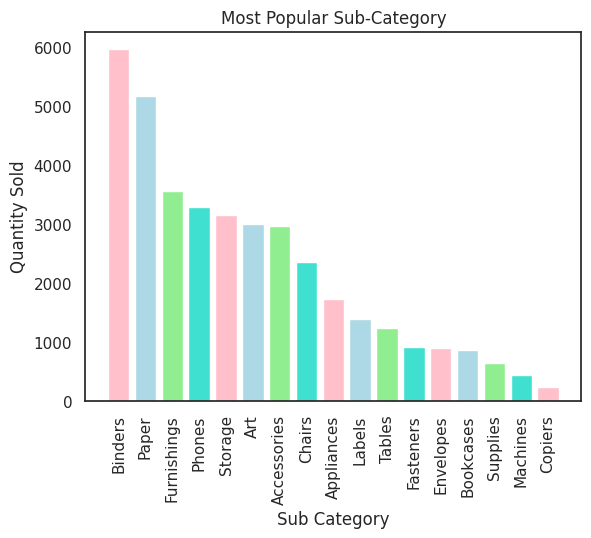

In [ ]:
## bar plot
colors = ['pink', 'lightblue', 'lightgreen','TURQUOISE']
plt.bar(sub_category_popularity['Sub-Category'], sub_category_popularity['Quantity'],color=colors)
plt.xticks(sub_category_profit['Sub-Category'] , rotation = "vertical")
plt.xlabel("Sub Category")
plt.ylabel("Quantity Sold")
plt.title("Most Popular Sub-Category")
plt.show()

### **Total Sales and Profit by Category and Sub-Category.**

In [ ]:
df.groupby(['Category','Sub-Category']).sum()

<ipython-input-57-831f7dbde023>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Sales  Quantity  Discount      Profit
Category        Sub-Category                                             
Furniture       Bookcases     114879.9963       868     48.14  -3472.5560
                Chairs        328167.7310      2354    104.70  26602.2251
                Furnishings    91705.1640      3563    132.40  13059.1436
                Tables        206965.5320      1241     83.35 -17725.4811
Office Supplies Appliances    107532.1610      1729     77.60  18138.0054
                Art            27118.7920      3000     59.60   6527.7870
                Binders       203412.7330      5974    567.00  30221.7633
                Envelopes      16476.4020       906     20.40   6964.1767
                Fasteners       3024.2800       914     17.80    949.5182
                Labels         12486.3120      1400     25.00   5546.2540
                Paper          78479.2060      5178    102.60  34053.5693
                Storage       223843.6080      3158     63.20  21278.8264
                Supplies       46673.5380       647     14.60  -1189.0995
Technology      Accessories   167380.3180      2976     60.80  41936.6357
                Copiers       149528.0300       234     11.00  55617.8249
                Machines      189238.6310       440     35.20   3384.7569
                Phones        330007.0540      3289    137.40  44515.7306

#### **Conclusion**
- Furniture has significantly lower total profit value among other categories.

- From the graph , it is shown that Tables, Bookcases, Supplies  are the subcategories that are causing the most losses, as far as negative profit figures.
- Copiers,Phones,Accessories,Paper,Binders are the subcategories that are most profitable.
- Phones and Chairs make up almost 30% of all sales.

- Binders,Paper,Furnishings,Phones are the best seling sub-categories.


It is an immediate recommendation that:

- Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Copiers,Phones,Accessories,Paper,Binders.
- Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.
Another interesting fact- people dont prefer to buy Tables, Bookcases and Supplies from Superstore. Hence these departments are in loss.

## **Time Series Analysis**

### **Most preferred Ship Mode.**

In [ ]:
ship_mode_info = df.groupby('Ship Mode').sum()
ship_mode_info

<ipython-input-58-4f844da14258>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Sales,Quantity,Discount,Profit
Ship Mode,,,,
First Class,3.514284e+05,5693,253.17,48969.8399
Same Day,1.283631e+05,1960,82.75,15891.7589
Second Class,4.591936e+05,7423,270.15,57446.6354
Standard Class,1.357934e+06,22795,954.72,164100.8463


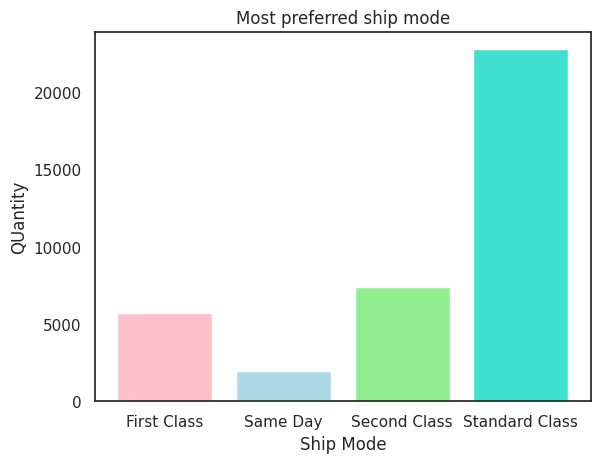

In [ ]:
## bar plot
colors = ['pink', 'lightblue', 'lightgreen','TURQUOISE']
plt.bar(ship_mode_info.index, ship_mode_info['Quantity'],color=colors)
plt.xticks(ship_mode_info.index)
plt.xlabel("Ship Mode")
plt.ylabel("QUantity")
plt.title("Most preferred ship mode")
plt.show()

### **Visualize the 'Category' column from the Ship mode column dataset standpoints.**

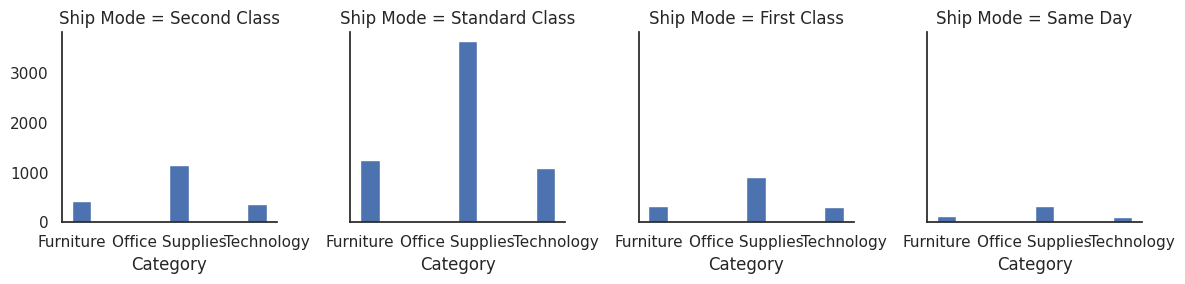

In [ ]:
category_hist = sns.FacetGrid(df, col='Ship Mode', palette='rainbow')
category_hist.map(plt.hist, 'Category')

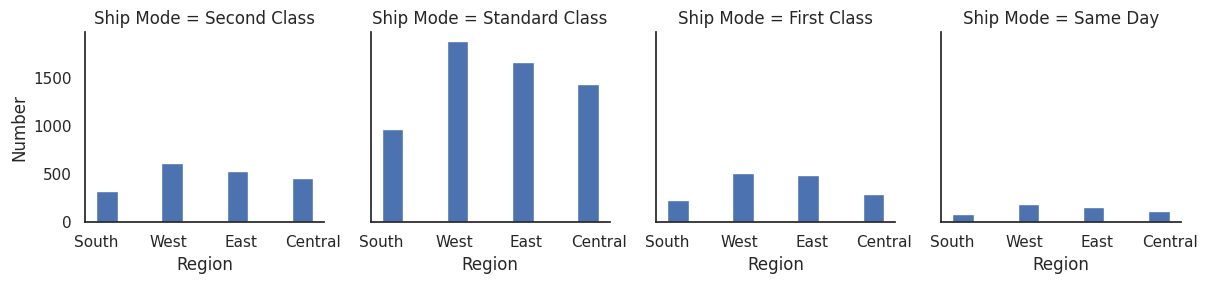

In [ ]:
# Let's try to visualize the 'Region' column from the Shipmode column dataset standpoints.

region_hist = sns.FacetGrid(df, col='Ship Mode', palette='rainbow')
region_hist.map(plt.hist, 'Region')
region_hist.set_ylabels('Number')

## Sales

In [ ]:
# create timeseries table, group by order date and sum sales and profit
data_timeseries = df.copy()
data_timeseries = data_timeseries[['Order Date', 'Sales', 'Profit']].groupby('Order Date', as_index = False).sum()

# convert order date column to timestemp datatype
data_timeseries['Order Date'] = pd.to_datetime(data_timeseries['Order Date'])

# sort by date
data_timeseries = data_timeseries.sort_values(by = 'Order Date')

# Plot

fig = px.area(x = data_timeseries['Order Date'],
              y = data_timeseries['Sales'],
              template = 'simple_white',
              color_discrete_sequence = colors,
             )

# layout
fig.update_layout(
    yaxis_title = "Sales",
    xaxis_title="Date",
    font = dict(
            size = 13
            ),
    title={
        'text': "Sales over Time Period(2014-2018)<br>(Range Slider and Selectors)",
        'y':0.95,
        'x':0.9
        },
    template = 'simple_white'
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="last month", step="month", stepmode="backward"),
            dict(count=6, label="last 6 month", step="month", stepmode="backward"),
            dict(count=1, label="last year", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

### Profit

In [ ]:


# Plot

fig = px.area(x = data_timeseries['Order Date'],
              y = data_timeseries['Profit'],
              template = 'simple_white',
              color_discrete_sequence = [colors[1]],
             )

# layout
fig.update_layout(
    yaxis_title = "Profit",
    xaxis_title="Date",
    font = dict(
            size = 13
            ),
    title={
        'text': "Profit over Time Period(2014-2018)<br>(Range Slider and Selectors)",
        'y':0.95,
        'x':0.9
        },
    template = 'simple_white'
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="last month", step="month", stepmode="backward"),
            dict(count=6, label="last 6 month", step="month", stepmode="backward"),
            dict(count=1, label="last year", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

### Sales and Profit

In [ ]:
data_timeseries['Profitable'] = data_timeseries['Profit'] / abs(data_timeseries['Profit'])
data_timeseries['Profitable'] = data_timeseries['Profitable'].fillna(0)
data_timeseries['Profitable'] = data_timeseries['Profitable'].astype(int)

fig = go.Figure(go.Scatter(
                 x = data_timeseries['Order Date'],
                 y = data_timeseries['Profit'],
                 mode='markers',
                 marker=dict(
                         size = data_timeseries['Sales']/500,
                         color= data_timeseries['Profitable'])
             )
               )
# layout
fig.update_layout(
    yaxis_title = "Profit",
    xaxis_title="Date",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Sales & Profit over Time Period(2014-2018)",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white',
)

fig.show()

### Order Date and Ship Date

In [ ]:
# create table
data_shipping_time = df.copy()
data_shipping_time['Shipping Time'] = pd.to_datetime(data_shipping_time['Ship Date']) - pd.to_datetime(data_shipping_time['Order Date'])
ship_mode_and_time = data_shipping_time.groupby('Ship Mode', as_index = False)['Shipping Time'].mean()
ship_mode_and_time['Shipping Time'] = ship_mode_and_time['Shipping Time'].dt.days

# plot
fig = px.bar(x = ship_mode_and_time['Ship Mode'],
             y = ship_mode_and_time['Shipping Time'],
             color = ship_mode_and_time['Ship Mode'],
             template = 'simple_white',
             color_discrete_sequence = ['#1192AA','#000000','#00B8C0', '#73D4D3'])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Shipping Mode",
    yaxis_title="Number of Days",
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Average Delivery Time by Shipping Mode<br>(days)",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

In [ ]:
# create table
data_shipping_time = df.copy()
data_shipping_time['Shipping Time'] = pd.to_datetime(data_shipping_time['Ship Date']) - pd.to_datetime(data_shipping_time['Order Date'])

data_shipping_time['Shipping Time'] = data_shipping_time['Shipping Time'].dt.days

data_shipping_time = data_shipping_time.groupby('Shipping Time', as_index = False).sum()

sales_data_shipping_time = data_shipping_time.sort_values(by = 'Sales')

# plot
fig = px.bar(x = sales_data_shipping_time['Sales'],
             y = sales_data_shipping_time['Shipping Time'],
             orientation = 'h',
             template = 'simple_white',
             color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Total Sales",
    yaxis_title="Number of Days",
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Sales by Average Delivery Time<br>(days)",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

<ipython-input-66-059aef11530c>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
# create table
data_shipping_time = df.copy()
data_shipping_time['Shipping Time'] = pd.to_datetime(data_shipping_time['Ship Date']) - pd.to_datetime(data_shipping_time['Order Date'])

data_shipping_time['Shipping Time'] = data_shipping_time['Shipping Time'].dt.days

data_shipping_time = data_shipping_time.groupby('Shipping Time', as_index = False).sum()

profit_data_shipping_time = data_shipping_time.sort_values(by = 'Profit')

# plot
fig = px.bar(x = profit_data_shipping_time['Profit'],
             y = profit_data_shipping_time['Shipping Time'],
             orientation = 'h',
             template = 'simple_white',
             color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Total Profit",
    yaxis_title="Number of Days",
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Profit by Average Delivery Time<br>(days)",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

<ipython-input-67-64c0ceedce50>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:

# create table
data_shipping_time = df.copy()
data_shipping_time['Shipping Time'] = pd.to_datetime(data_shipping_time['Ship Date']) - pd.to_datetime(data_shipping_time['Order Date'])

data_shipping_time['Shipping Time'] = data_shipping_time['Shipping Time'].dt.days

margin_data_shipping_time = data_shipping_time.groupby('Shipping Time', as_index = False).sum()

margin_data_shipping_time['Profit Margin'] = data_shipping_time['Profit'] / data_shipping_time['Sales'] * 100
# plot
fig = px.bar(x = margin_data_shipping_time['Profit Margin'],
             y = margin_data_shipping_time['Shipping Time'],
             color = [colors[2], colors[2], colors[2], colors[2], 'hotpink',  colors[2], colors[2], colors[2]],
             orientation = 'h',
             template = 'simple_white',
             color_discrete_sequence = [colors[2], 'hotpink']
            )

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Profit Margin (%)",
    yaxis_title="Number of Days",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Profit Margin by Average Delivery Time",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

<ipython-input-68-fa002c848b71>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### **Conclusion**


* **Sales and Profit series act normally. Some small sharp rises in sales are visible, for example on March 18, 2014 and October 2, 2016.**
* **Sales fluctuate more than Profit.**
* **There are several big bubbles, biggest red one (with a negative profit value) in March 2014. Big blue ones (with a positive profit value) began to appear more often after October 2016.**
* **On average, First Class orders take 2 days to deliver, Same Day 0 days (logically in the shipping in a same day), Second Class shipping take 3 days, and Standard Class 5 days.**
* **Total Sales and Total Profit distributed normally according to the number of days taken for delivery.**
* **Only orders that take 4 days to deliver make negative (and quite low) profit margin.**

## **Discounts.**

In [ ]:
## Total Sales:-
# create table
orders_with_discount = df1.copy()
orders_with_discount['With Discount'] = orders_with_discount['Discount'].apply(lambda x: x > 0)
orders_with_discount.replace({False: 'Without Discount', True: 'With Discount'}, inplace = True)

orders_with_discount_sales = orders_with_discount[['With Discount', 'Sales']].groupby('With Discount', as_index = False).sum()

# plot
fig = go.Figure(go.Pie(labels = orders_with_discount_sales['With Discount'],
                 values = orders_with_discount_sales['Sales'],
                 )
        )
fig.update_traces(
    marker=dict(
            colors=colors,
            line=dict(
                    color='#000000',
                    width=1
            )
    ),
    hole = 0.45
)

#Set Title and x/y axis labels
fig.update_layout(
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Sales by Order Type<br>(With Discount/Without Discount)",
        'y':0.9,
        'x':0.1
        },
    template = 'simple_white',
    )

fig.show()

In [ ]:
## Mean Sales.
orders_with_discount_mean_sales = orders_with_discount[['With Discount', 'Sales']].groupby('With Discount', as_index = False).mean()

## PLOT
# bar chart
fig = px.bar(x = orders_with_discount_mean_sales['With Discount'],
             y = orders_with_discount_mean_sales['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Mean Sales by Order Type<br>(With Discount/Without Discount)",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

In [ ]:
## Total   Profit
#create table
orders_with_discount_profit = orders_with_discount[['With Discount', 'Profit']].groupby('With Discount', as_index = False).sum()

# plot
fig = px.bar(x = orders_with_discount_profit['With Discount'],
             y = orders_with_discount_profit['Profit'],
             color = orders_with_discount_profit['With Discount'],
             template = 'simple_white',
             color_discrete_sequence = ['hotpink', colors[0]]
                 )


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title = "",
    yaxis_title = "Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Total Profit by Order Type<br>(With Discount/Without Discount)",
        'y':0.9,
        'x':0.1
        }
    )

fig.show()

In [ ]:
## Mean Profit
#create table
orders_with_discount_mean_profit = orders_with_discount[['With Discount', 'Profit']].groupby('With Discount', as_index = False).mean()

# plot
fig = px.bar(x = orders_with_discount_mean_profit['With Discount'],
             y = orders_with_discount_mean_profit['Profit'],
             color = orders_with_discount_mean_profit['With Discount'],
             template = 'simple_white',
             color_discrete_sequence = ['hotpink', colors[1]]
                 )

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title = "",
    yaxis_title = "Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Mean Profit by Order Type<br>(With Discount/Without Discount)",
        'y':0.9,
        'x':0.1
        }
    )

fig.show()

In [ ]:
## Profit Margin.
#create table
orders_with_discount_profit_margin = orders_with_discount[['With Discount', 'Profit', 'Sales']].groupby('With Discount', as_index = False).sum()
orders_with_discount_profit_margin['Profit Margin'] = orders_with_discount_profit_margin['Profit'] / orders_with_discount_profit_margin['Sales'] * 100
# plot
fig = px.bar(x = orders_with_discount_profit_margin['With Discount'],
             y = orders_with_discount_profit_margin['Profit Margin'],
             color = orders_with_discount_profit_margin['With Discount'],
             template = 'simple_white',
             color_discrete_sequence = ['hotpink', colors[2]]
                 )

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title = "",
    yaxis_title = "Profit Margin (%)",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "Profit Margin by Order Type<br>(With Discount/Without Discount)",
        'y':0.9,
        'x':0.1
        }
    )

fig.show()

### **Category Columns and Discount.**

In [ ]:
fig = px.histogram(x = orders_with_discount['Ship Mode'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Shipping Mode",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Shipping Mode and Order Type<br>(With Discount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show()

In [ ]:
fig = px.histogram(x = orders_with_discount['Segment'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Segment and Order Type<br>(With Discount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show()

In [ ]:
fig = px.histogram(x = orders_with_discount['Category'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Category and Order Type<br>(With Discount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show()

In [ ]:
fig = px.histogram(x = orders_with_discount['Sub-Category'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Sub-Category and Order Type<br>(With Discount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show()

### **Geo Columns and Discount**

In [ ]:
fig = px.histogram(x = orders_with_discount['Region'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),
    title={
        'text': "Frequency of Orders by Region and Order Type<br>(With Discount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show()

In [ ]:
# create table
orders_with_discount_map = orders_with_discount['State_abb'].to_frame()

for x in orders_with_discount['With Discount'].unique():
    orders_with_discount_map[x] = orders_with_discount.loc[orders_with_discount['With Discount'] == x]['With Discount']

# Group by State_abb and count
orders_with_discount_map = orders_with_discount_map[['With Discount', 'Without Discount', 'State_abb']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
orders_with_discount_map.reset_index(inplace = True)
orders_with_discount_map.head(3)

,State_abb,With Discount,Without Discount
0,AL,0,61
1,AR,0,60
2,AZ,224,0


In [ ]:
fig = go.Figure()

colors = ['#796AAE', '#1192AA']
columns = ['With Discount', 'Without Discount']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = orders_with_discount_map['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = orders_with_discount_map[column],
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Orders by Category Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()

#### **Conclusion**

* **Distribution of Total Sales and Mean Sales by Order Type is approximately equal.**
* **Total Profit, Mean Profit and Profit Margin values of orders with discounts are negative.**
* **Considering Shipping mode the number of orders by type of order distributed fairly evenly.**
* **Considering Segment the number of orders by type of order distributed fairly evenly.**
* **Considering Segment the number of orders by type of order distributed fairly evenly.**
* **Considering Category the number of orders by type of order distributed fairly evenly.**
* **Considering Sub-Category there are some subcategories with high number of orders with discount (for example blinders, phones, chairs) and some orders with high number of orders without discount (for example paper, furnishing, storage).**
* **Central Region has much more orders with discount than without.**
* **In some states like Texas or Ohio all orders are only with discount.**

### **Profit analysis based on discount.**

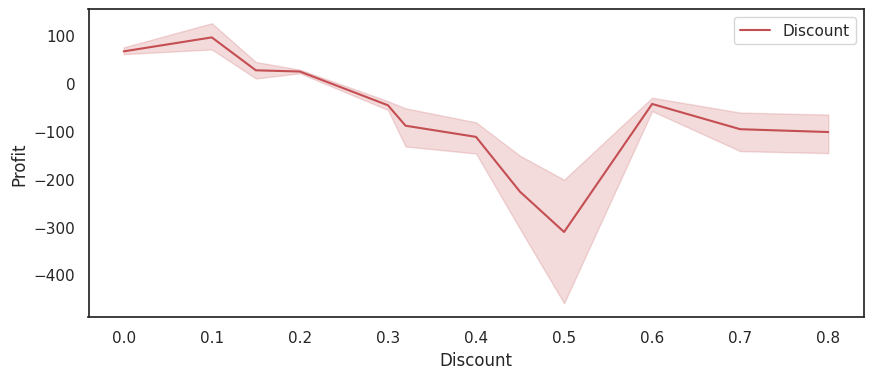

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Discount', y='Profit', data=df, color='r', label='Discount')
plt.legend()
plt.show()


#### The main reason for losses is discounts. To improve this, I recommend offering more discounts during festival seasons, as this will result in more sales. During these seasons, the discount rate is recommended to be not more 20% as more than a 20% discount brings in great losses.

***************************************************************************************************************************************************************************

### **Recommendations.**

> - Focus on Technology sub-category and Phones and Copiers as they are highest selling and most profitable. Bundle them with the less profitable products such as Tables,Bookcases and supplies to offset the losses.
- Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.
- For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.
- For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.
- Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.
- The main reason which leads to loss is Discount as if some areas lead to loss due to more discounts, and some areas lead to fewer sales due to fewer discounts, hence it needs to be improved. It is better to give more discounts during festival seasons, additionally, that will result in more sales. The Home office segment needs better improvement. Some cities have fewer sales, lack of awareness can be the reason for this, hence advertising in those cities might help in more sales.

***************************************************************************************************************************************************************************